# ALilVis4StripePricing

#### This notebook attempts to present a visual for price-to-revenue models for using the Stripe payment service. Note: This open-source tool can also be used to investigate other visualizations for any types of payment services given a general function for cost!

In [180]:
# Import dependancies
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import *
from IPython.display import HTML, display

Stripe charges users of the service 2.9% + $0.30 as of Febuary 2018. The graph below illustrates how much Stripe charges given the total cost of the purchase.

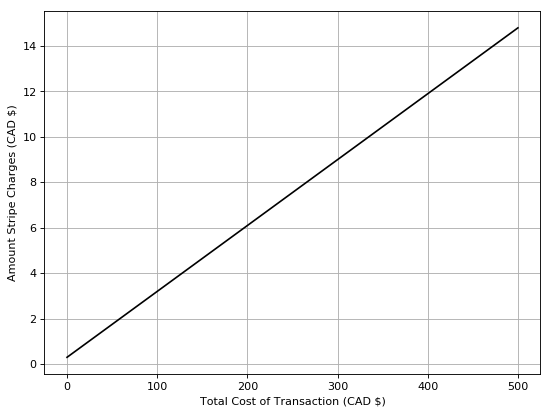

In [224]:
def stripe_base_pricing(x):
    return 0.029*x+0.30

t1 = np.arange(0, 501, 10)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w')
plt.xlabel("Total Cost of Transaction (CAD $)")
plt.ylabel("Amount Stripe Charges (CAD $)")

plt.plot(t1, stripe_base_pricing(t1), 'k')
plt.grid()


Given the **percentage we charge the seller** for using our platform to sell their product, the cell below generates a table and a graph that illustrates the amount of dollars the seller made from that transaction as well as our share of the net revenue. The slider bellow can be used to change the percentage of the net revenue that we give sellers. 

Algorithm details:
    1. net profit = total cost - cost for using stripe
    2. seller revenue = percentage that we want to give to the seller from the net profit
    3. our revenue = net profit - seller revenue

total_cost,stripe_charge,sellers_revenue,our_revenue
111.00,3.52,102.11,5.37
148.00,4.59,136.24,7.17
185.00,5.67,170.37,8.97
222.00,6.74,204.50,10.76
259.00,7.81,238.63,12.56
296.00,8.88,272.76,14.36
333.00,9.96,306.89,16.15
370.00,11.03,341.02,17.95


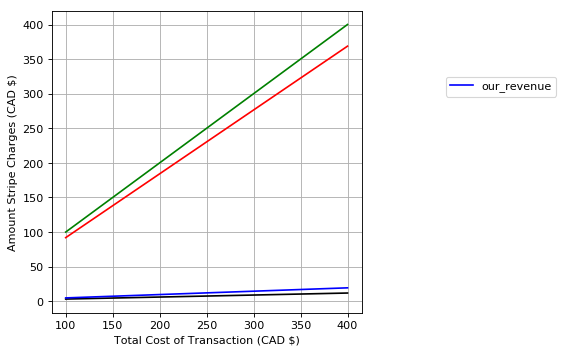

In [252]:
t1 = np.arange(100, 401)
def revenue(rev):
    plt.figure(figsize=(5, 5), dpi=80, facecolor='w')
    plt.xlabel("Total Cost of Transaction (CAD $)")
    plt.ylabel("Amount Stripe Charges (CAD $)")
    
    
    # cost of customer transaction
    plt.plot(t1, t1, 'g', '')
    # how much stripe is charging for the transaction
    plt.plot(t1, stripe_base_pricing(t1), 'k', label='stripe_cost')    
    # how much seller makes from this transaction
    net_money = t1-stripe_base_pricing(t1)
    seller_rev = (rev/100)*net_money
    plt.plot(t1, seller_rev, 'r', label='seller_revenue')
    # how much we are charging for that transaction
    our_rev = net_money - (rev/100)*net_money
    plt.plot(t1, our_rev, 'b', label='our_revenue')
    plt.grid()
    
    
    ax = plt.subplot(111)
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), ncol=1)
    
    vals = [['total_cost', 'stripe_charge', 'sellers_revenue', 'our_revenue']]
    val = int((max(t1)-min(t1))/8)
    for i, stripe_cost, s_rev, o_rev in zip(t1, stripe_base_pricing(t1), seller_rev, our_rev):
        if i % val == 0:
            temp = [i, stripe_cost, s_rev, o_rev]
            temp = ['%.2f' % item for item in temp]
            vals.append(temp)
    display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in vals)
            )
     ))
    

interact(revenue, rev=widgets.IntSlider(min=0,max=100, value=95));